In [6]:
#This section loads the csv file into a numpy data matrix
import numpy as np
import csv
import matplotlib.pyplot as plt

data = [] # Create empty data list

#Load csv file into data --- 
with open('digitData.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if len(row) != 0:
            data = data + [row]
#---

data =  np.asarray(data) #Convert regular array to numpy array.
print(data)
print("done")

[['label' 'pixel0' 'pixel1' ..., 'pixel781' 'pixel782' 'pixel783']
 ['1' '0' '0' ..., '0' '0' '0']
 ['0' '0' '0' ..., '0' '0' '0']
 ..., 
 ['7' '0' '0' ..., '0' '0' '0']
 ['6' '0' '0' ..., '0' '0' '0']
 ['9' '0' '0' ..., '0' '0' '0']]
done


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254
  231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254
  254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 19

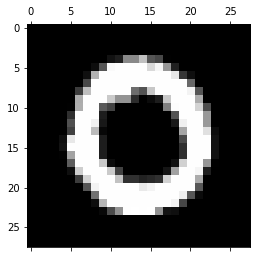

In [2]:
#Cell used to visualize data as a human does

displayPixelValues = data[2][1:]  #Gather all pixel values from first data point

displayPixelValues = np.reshape(displayPixelValues, (-1, 28)) #Reshape data to 28 by 28 array instead of 784 by 1 array
displayPixelValues = displayPixelValues.astype(np.int) #Convert the data into integers from strings
print(displayPixelValues) #Print out array of single digit

plt.matshow(displayPixelValues, fignum=10,cmap=plt.cm.gray) #Make grayscale representation of digit
plt.show() #Show grayscale representation of digit

In [3]:
def sigmoid(x):
    #If overflow error, return small values for zero
    return 1/(1+np.exp(-x))
"""def squaredErrorSum(errors, lablel):
    errors[label][0] = 1 - activation_2[label] #Get error of index of target value
    squaredErrorSum = 0 
    for e in range(errors.size):
        squaredErrorSum += (errors[e][0] ** 2) #Sum up errors and square them"""

'def squaredErrorSum(errors, lablel):\n    errors[label][0] = 1 - activation_2[label] #Get error of index of target value\n    squaredErrorSum = 0 \n    for e in range(errors.size):\n        squaredErrorSum += (errors[e][0] ** 2) #Sum up errors and square them'

In [4]:
#np.random.seed(1)

layer0_neurons = 784 #Number of pixels = 784
layer1_neurons = 30 #Number of middle layer neurons. I picked 30 for now
layer2_neurons = 10 #Output neurons here. 
                    #The activation of the output neurons are the "guesses"
#Initialize random weights and biases
layer1_b = np.zeros((layer1_neurons,1))#Initialize layer_1 biases to 0. This is a 784 by 1 matrix
layer1_w = (2*np.random.random((layer1_neurons,layer0_neurons)) - 1) /100 #Initialize layer_1 weights to a value between -.01 and .01 This is a 30 by 784 matrix
layer2_b = np.zeros((layer2_neurons,1)) #Initialize layer_2 biases to 0. This is a 30 by 1 matrix
layer2_w = (2*np.random.random((layer2_neurons,layer1_neurons)) - 1) /100 #Initialize layer_2 weights to to a value between -.01 and .01 This is a 10 by 30 matrix

In [5]:
trainingSize = 2 #Total number of training examples
for d in range(1,trainingSize+1): #
    pixelValues = data[d][1:] #Get pixel values of data
    pixelValues = pixelValues.astype(np.int) #Convert the data from strings to integers
    pixelValues = pixelValues.reshape((784,1)) #Reshape data as a 784 by 1 matrix

    x = pixelValues #Input data
    x = x/255 #map grayscale values (0-255) to a value between 0 and 1 
    z_1 = np.dot(layer1_w,x)+layer1_b #Take dot product of layer_1 and input pixel values
    activation_1 = sigmoid(z_1) #Activation function of z_1. This is the output of layer_1 which is the input to layer_2

    z_2 = np.dot(layer2_w,activation_1)+layer2_b #Take dot product of layer_2 and layer_1 values
    activation_2 = sigmoid(z_2) #Activation function of z_2. This is the output or 'guesses'
    
    print("Digit example %s final layer activation (guesses):" %(d))
    print(activation_2) #Print guesses
    
    #Calculate squared error sum of activation_2
    label = data[d][0].astype(np.int) #Get label of curret datapoint as integer  
    errors = activation_2.copy() #Copy elements of activation_2 into errors
    errors[label][0] = 1 - activation_2[label] #Get error of index of target value
    squaredErrorSum = 0 
    for e in range(errors.size):
        squaredErrorSum += (errors[e][0] ** 2) #Sum up errors and square them
    print("Squared error sum is",squaredErrorSum)

Digit example 1 final layer activation (guesses):
[[ 0.50323887]
 [ 0.4935041 ]
 [ 0.49589489]
 [ 0.4966918 ]
 [ 0.49667456]
 [ 0.50091728]
 [ 0.4929486 ]
 [ 0.49761832]
 [ 0.49065845]
 [ 0.49783396]]
Squared error sum is 2.47921234673
Digit example 2 final layer activation (guesses):
[[ 0.50313876]
 [ 0.49334065]
 [ 0.49577091]
 [ 0.49686044]
 [ 0.49668496]
 [ 0.50059763]
 [ 0.49291947]
 [ 0.4976719 ]
 [ 0.49070867]
 [ 0.49786525]]
Squared error sum is 2.45952086438
